# Основы работы с numpy

In [1]:
import numpy as np

## Задания для выполнения
- 1 - Загрузите данные в ноутбук

In [2]:
rus = np.genfromtxt('1.csv', dtype = 'str', delimiter = ',', skip_header = 3, skip_footer = 1)
math = np.genfromtxt('2.csv', dtype = 'str', delimiter = ',', skip_header = 3, skip_footer = 1)  
phys = np.genfromtxt('3.csv', dtype = 'str', delimiter = ',', skip_header = 3, skip_footer = 1)
ikt = np.genfromtxt('4.csv', dtype = 'str', delimiter = ',', skip_header = 3, skip_footer = 1)

headers = np.genfromtxt('1.csv', dtype = 'str', delimiter = ',', skip_header = 2, skip_footer = 3049)

In [3]:
rus

array([['1', '117', '11', ..., '8', '20', '24'],
       ['2', '148', '12А', ..., '8', '20', '24'],
       ['3', '152', '13', ..., '9', '22', '24'],
       ...,
       ['3046', '147', '11', ..., '58', '100', '24'],
       ['3047', '147', '11', ..., '58', '100', '24'],
       ['3048', '144', '11А', ..., '58', '100', '24']], dtype='<U48')

In [4]:
headers

array(['№', '№ школы', 'Класс', 'Пол', 'Номер варианта',
       'Задания с кратким ответом', 'Задания с развёрнутым ответом',
       'Устная часть', 'Первичный балл', 'Балл', 'Минимальный балл'],
      dtype='<U29')

 - 2 - Сделайте описательную статистику по набранному баллу

In [5]:
import collections

def mark_describer(df):
    marks = df[:, 9].astype(int)
    return {'count': collections.Counter(marks), 'mean': marks.mean(), 'std': marks.std(), 'var': marks.var(), 'min': marks.min(), '25%': np.quantile(marks, 0.25), '50%': np.quantile(marks, 0.50), '75%': np.quantile(marks, 0.75), 'max': marks.max(), 'median': np.median(marks)}

In [6]:
# функция для результатов
def results(function):
    subjects = [rus, math, phys, ikt]
    s_names = ['Русский язык', 'Математика', 'Физика', 'ИКТ']
    for i in range(4):
        print(s_names[i])
        print(function(subjects[i]), '\n')

In [7]:
results(mark_describer)

Русский язык
{'count': Counter({80: 158, 82: 157, 78: 148, 89: 147, 87: 143, 72: 140, 73: 140, 85: 133, 76: 131, 91: 119, 71: 117, 70: 114, 69: 113, 94: 106, 67: 101, 66: 98, 64: 97, 65: 86, 62: 77, 60: 67, 61: 67, 59: 58, 96: 57, 57: 55, 55: 49, 54: 47, 56: 47, 98: 38, 51: 33, 49: 29, 50: 26, 53: 25, 45: 16, 46: 16, 40: 12, 41: 11, 43: 9, 44: 9, 48: 9, 100: 8, 36: 6, 32: 5, 39: 5, 30: 3, 34: 3, 38: 3, 20: 2, 22: 2, 24: 2, 26: 2, 28: 2}), 'mean': 72.76902887139107, 'std': 13.662665812887763, 'var': 186.66843711465202, 'min': 20, '25%': 64.0, '50%': 72.0, '75%': 82.0, 'max': 100, 'median': 72.0} 

Математика
{'count': Counter({39: 265, 45: 264, 50: 256, 33: 231, 56: 193, 62: 173, 27: 154, 68: 153, 70: 144, 72: 98, 23: 97, 74: 73, 18: 65, 76: 51, 78: 36, 14: 35, 82: 14, 9: 13, 80: 13, 5: 7, 84: 6, 88: 5, 90: 3, 96: 3, 86: 2, 92: 2}), 'mean': 49.25509337860781, 'std': 17.87662501523297, 'var': 319.5737219352533, 'min': 5, '25%': 33.0, '50%': 50.0, '75%': 68.0, 'max': 96, 'median': 50.0} 


 - 3 - Найдите процент учащихся, выполнивших работу ниже среднего

In [8]:
def worst_student_percentage(df):
    marks = df[:, 9].astype(int)
    return round(marks[marks < marks.mean()].shape[0] / marks.shape[0] * 100, 0)

In [9]:
results(worst_student_percentage)

Русский язык
51.0 

Математика
48.0 

Физика
56.0 

ИКТ
46.0 



 - 4 - Найти процент учащихся не сдавших экзамен

In [10]:
def falled_percentage(df):
    marks = df[:, 9].astype(int)
    min_mark = df[1, 10].astype(int)
    return round(marks[marks < min_mark].shape[0] / marks.shape[0] * 100, 2)

In [11]:
results(falled_percentage)

Русский язык
0.13 

Математика
9.21 

Физика
7.71 

ИКТ
11.35 



 - 5 - Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен



In [12]:
import matplotlib.pyplot as plt

def show_pie_passed_failed(df):
    labels = ['passed', 'failed']
    sizes = [100 - falled_percentage(df), falled_percentage(df)]
    colors = ['green', 'red']
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels = labels , colors = colors, autopct='%1.2f%%')
    return plt.show()

Русский язык:


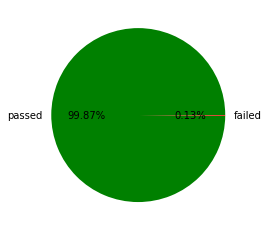

Математика:


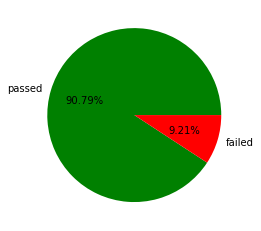

Физика:


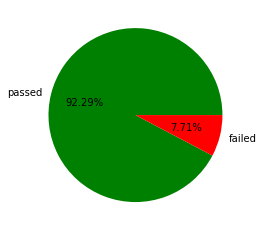

ИКТ:


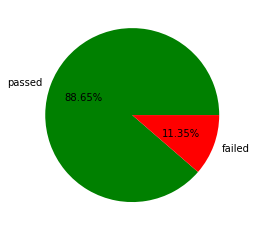

In [13]:
subjects = [rus, math, phys, ikt]
s_names = ['Русский язык', 'Математика', 'Физика', 'ИКТ']
for i in range(4):
    print(s_names[i] + ':')
    show_pie_passed_failed(subjects[i])

 - 6 - Постройте ядерную оценку плотности распределению баллов за экзамен

<AxesSubplot:ylabel='Density'>

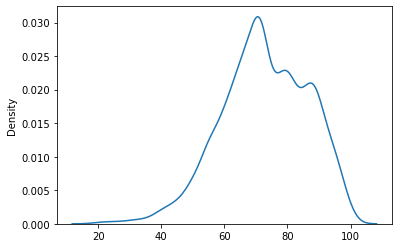

In [14]:
import seaborn as sns

sns.kdeplot(rus[:, 9].astype(int))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

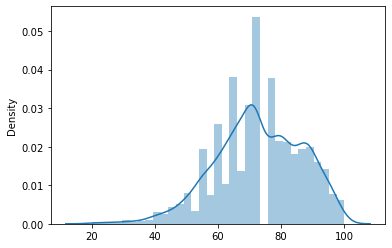

In [15]:
# Distplot () собирает функциональность Hist Matplotlib (в) и ядерной плотности функции kdeplot (),
# увеличение распределения RugPlot наблюдения
# параметр hist = False - уберет гистограмму 
sns.distplot(rus[:, 9].astype(int))

<AxesSubplot:ylabel='Density'>

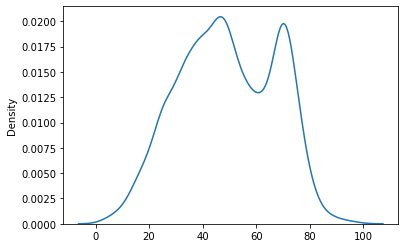

In [16]:
sns.kdeplot(math[:, 9].astype(int))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

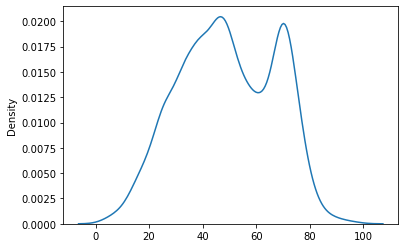

In [17]:
sns.distplot(math[:, 9].astype(int), hist = False)

<AxesSubplot:ylabel='Density'>

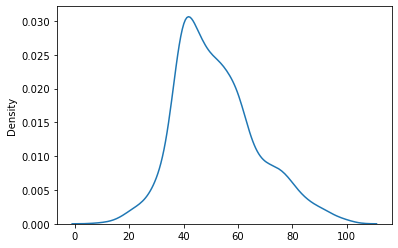

In [18]:
sns.kdeplot(phys[:, 9].astype(int))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

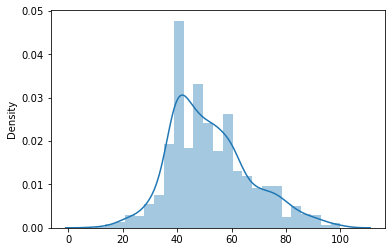

In [19]:
sns.distplot(phys[:, 9].astype(int))

<AxesSubplot:ylabel='Density'>

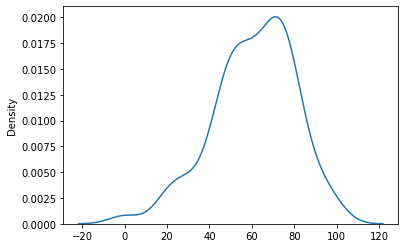

In [20]:
sns.kdeplot(ikt[:, 9].astype(int))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

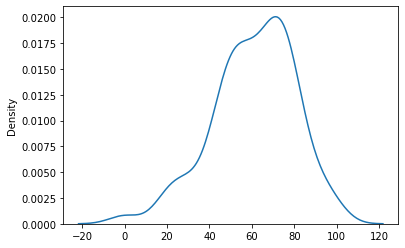

In [21]:
sns.distplot(ikt[:, 9].astype(int), hist = False)

 - 7 - Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [22]:
# пусть система «отлично»/«хорошо»/«удовлетворительно»/«неудовлетворительно» будет как у нас в вузе:
# «отлично»: x >= 86
# «хорошо»: 70 <= x < 86
# «удовлетворительно»: 50 <= x < 70
# «неудовлетворительно»: x < 50

In [23]:
def estimated_marks(df):
    marks = df[:, 9].astype(int)
    return {'отлично': round(marks[marks >= 86].shape[0] / marks.shape[0] * 100, 2), 'хорошо': round(marks[(marks >= 70) & (marks < 86)].shape[0] / marks.shape[0] * 100, 2),'удовлетворительно': round(marks[(marks >= 50) & (marks < 70)].shape[0] / marks.shape[0] * 100, 2), 'неудовлетворительно': round(marks[marks < 50].shape[0] / marks.shape[0] * 100, 2)}

In [24]:
results(estimated_marks)

Русский язык
{'отлично': 20.28, 'хорошо': 40.62, 'удовлетворительно': 34.32, 'неудовлетворительно': 4.79} 

Математика
{'отлично': 0.64, 'хорошо': 18.46, 'удовлетворительно': 32.89, 'неудовлетворительно': 48.01} 

Физика
{'отлично': 2.97, 'хорошо': 11.44, 'удовлетворительно': 35.17, 'неудовлетворительно': 50.42} 

ИКТ
{'отлично': 7.09, 'хорошо': 31.91, 'удовлетворительно': 36.17, 'неудовлетворительно': 24.82} 



 - 8 - Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [25]:
def exam_gender(df):
    marks = df[:, 3]
    return {'Юноши': round(marks[marks == 'М'].shape[0] / marks.shape[0] * 100, 2), 'Девушки': round(marks[marks == 'Ж'].shape[0] / marks.shape[0] * 100, 2)}

In [26]:
results(exam_gender)

Русский язык
{'Юноши': 42.03, 'Девушки': 57.97} 

Математика
{'Юноши': 47.16, 'Девушки': 52.84} 

Физика
{'Юноши': 68.64, 'Девушки': 31.36} 

ИКТ
{'Юноши': 77.3, 'Девушки': 22.7} 



 - 9 - Сколько школ принимало участие в экзамене?

In [27]:
def school_counter(df):
    return np.unique(df[:, 1]).shape[0]

In [28]:
results(school_counter)

Русский язык
24 

Математика
17 

Физика
19 

ИКТ
10 



## Дополнительные задания
- Сколько всего заданий с кратким ответом? С развернутым ответом?

In [29]:
import re

def short_and_long_questions(df):
    short = len(df[1, 5])
    long = len(re.findall(r'[)]', df[1, 6]))    
    return {'Кол-во вопросов с коротким ответом': short, 'Кол-во вопросов с развернутым ответом': long}

In [30]:
results(short_and_long_questions)

Русский язык
{'Кол-во вопросов с коротким ответом': 25, 'Кол-во вопросов с развернутым ответом': 12} 

Математика
{'Кол-во вопросов с коротким ответом': 12, 'Кол-во вопросов с развернутым ответом': 7} 

Физика
{'Кол-во вопросов с коротким ответом': 27, 'Кол-во вопросов с развернутым ответом': 5} 

ИКТ
{'Кол-во вопросов с коротким ответом': 23, 'Кол-во вопросов с развернутым ответом': 4} 



In [31]:
# без регулярных
def short_and_long_questions_(df):
    short = len(df[1, 5])
    l = list(df[1, 6])
    long = len(l[::4])
    return {'Кол-во вопросов с коротким ответом': short, 'Кол-во вопросов с развернутым ответом': long}

In [32]:
results(short_and_long_questions_)

Русский язык
{'Кол-во вопросов с коротким ответом': 25, 'Кол-во вопросов с развернутым ответом': 12} 

Математика
{'Кол-во вопросов с коротким ответом': 12, 'Кол-во вопросов с развернутым ответом': 7} 

Физика
{'Кол-во вопросов с коротким ответом': 27, 'Кол-во вопросов с развернутым ответом': 5} 

ИКТ
{'Кол-во вопросов с коротким ответом': 23, 'Кол-во вопросов с развернутым ответом': 4} 



 - Пусть задания с кратким ответом будут задания типа В.
Соответственно всего по экзамену вопросов класса В: В1 … Вк 

Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [33]:
def B_percentage(df):
    all_answers = []
    for i in df[:, 5]:
        all_answers.append(list(i))
    all_answers = np.array(all_answers)
    all_answers[(all_answers == '0')|(all_answers == '-')] = '0'
    all_answers[all_answers != '0'] = '1'
    all_answers = all_answers.astype(int)
    done = all_answers.sum(axis = 0) / len(all_answers) * 100
    failed = 100 - done
    for i in range(len(done)):
        print('Номер',i+1,'= done:', round(done[i], 2), '+ failed:', round(failed[i], 2))
    return ''

In [34]:
results(B_percentage)

Русский язык
Номер 1 = done: 98.69 + failed: 1.31
Номер 2 = done: 92.88 + failed: 7.12
Номер 3 = done: 87.34 + failed: 12.66
Номер 4 = done: 77.3 + failed: 22.7
Номер 5 = done: 58.96 + failed: 41.04
Номер 6 = done: 90.62 + failed: 9.38
Номер 7 = done: 95.05 + failed: 4.95
Номер 8 = done: 75.59 + failed: 24.41
Номер 9 = done: 84.12 + failed: 15.88
Номер 10 = done: 96.88 + failed: 3.12
Номер 11 = done: 93.18 + failed: 6.82
Номер 12 = done: 75.52 + failed: 24.48
Номер 13 = done: 83.14 + failed: 16.86
Номер 14 = done: 70.18 + failed: 29.82
Номер 15 = done: 97.6 + failed: 2.4
Номер 16 = done: 68.96 + failed: 31.04
Номер 17 = done: 67.22 + failed: 32.78
Номер 18 = done: 74.18 + failed: 25.82
Номер 19 = done: 69.36 + failed: 30.64
Номер 20 = done: 82.74 + failed: 17.26
Номер 21 = done: 71.85 + failed: 28.15
Номер 22 = done: 48.06 + failed: 51.94
Номер 23 = done: 76.54 + failed: 23.46
Номер 24 = done: 24.77 + failed: 75.23
Номер 25 = done: 95.44 + failed: 4.56
 

Математика
Номер 1 = done: 89.

 - Аналогично и с типом С (ответы с развернутым ответом)
 
Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса C. 

In [35]:
def C_percentage(df):
    all_answers = []
    for i in df[:, 6]:
        i = list(i)
        all_answers.append(i[::4])
    all_answers = np.array(all_answers)
    all_answers[all_answers != '0'] = '1'
    all_answers = all_answers.astype(int)
    done = all_answers.sum(axis = 0) / len(all_answers) * 100
    failed = 100 - done
    for i in range(len(done)):
        print('Номер',i+1,'= done:', round(done[i], 2), '+ failed:', round(failed[i], 2))
    return ''

In [36]:
results(C_percentage)

Русский язык
Номер 1 = done: 96.75 + failed: 3.25
Номер 2 = done: 94.72 + failed: 5.28
Номер 3 = done: 94.46 + failed: 5.54
Номер 4 = done: 94.26 + failed: 5.74
Номер 5 = done: 96.46 + failed: 3.54
Номер 6 = done: 97.44 + failed: 2.56
Номер 7 = done: 92.39 + failed: 7.61
Номер 8 = done: 81.5 + failed: 18.5
Номер 9 = done: 84.19 + failed: 15.81
Номер 10 = done: 81.73 + failed: 18.27
Номер 11 = done: 98.0 + failed: 2.0
Номер 12 = done: 84.55 + failed: 15.45
 

Математика
Номер 1 = done: 33.91 + failed: 66.09
Номер 2 = done: 15.87 + failed: 84.13
Номер 3 = done: 15.58 + failed: 84.42
Номер 4 = done: 2.72 + failed: 97.28
Номер 5 = done: 3.4 + failed: 96.6
Номер 6 = done: 1.1 + failed: 98.9
Номер 7 = done: 3.4 + failed: 96.6
 

Физика
Номер 1 = done: 17.63 + failed: 82.37
Номер 2 = done: 38.22 + failed: 61.78
Номер 3 = done: 16.36 + failed: 83.64
Номер 4 = done: 23.39 + failed: 76.61
Номер 5 = done: 31.78 + failed: 68.22
 

ИКТ
Номер 1 = done: 65.96 + failed: 34.04
Номер 2 = done: 47.52 + f

 - Сделайте анализ по двум школам *

In [37]:
# найдем школы, ученики которых сдавали каждый из экзаменов

def schools_with_all_subjects():
    subjects = [rus, math, phys, ikt]
    school = list(set(subjects[0][:, 1]))
    for subj in subjects:
        s = list(set(subj[:, 1]))
        school = list(set(s) & set(school))
    return school

schools = schools_with_all_subjects()
schools

['137', '126']

- по всем выполненным заданиям типа В

In [38]:
def B_analitics_for_schools(schools, df0):
    school_1 = df0[df0[:, 1] == schools[0]]
    school_2 = df0[df0[:, 1] == schools[1]]
    schools_df = [school_1, school_2]
    f1_d1_f2_d2 = []
    for df in schools_df:
        all_answers = []
        for i in df[:, 5]:
            all_answers.append(list(i))
        all_answers = np.array(all_answers)
        all_answers[(all_answers == '0')|(all_answers == '-')] = '0'
        all_answers[all_answers != '0'] = '1'
        all_answers = all_answers.astype(int)
        done = all_answers.sum(axis = 0) / len(all_answers) * 100
        failed = 100 - done
        f1_d1_f2_d2.append(failed)
        f1_d1_f2_d2.append(done)
        
    print('              Школа 137            Школа 126')
    print('             Done/Failed          Done/Failed ')
    for i in range(len(f1_d1_f2_d2[0])):
        print('Номер',i+1, '    ', round(f1_d1_f2_d2[1][i], 2), '/', round(f1_d1_f2_d2[0][i], 2), '     ', round(f1_d1_f2_d2[3][i], 2), '/', round(f1_d1_f2_d2[2][i], 2))
    print('n сдававших:      ', len(school_1), '      /        ', len(school_2))
    return ''

In [39]:
# функция для результатов по аналитике
def results_analitycs(function):
    subjects = [rus, math, phys, ikt]
    s_names = ['Русский язык', 'Математика', 'Физика', 'ИКТ']
    schools = schools_with_all_subjects()
    for i in range(4):
        print(s_names[i])
        print(function(schools, subjects[i]), '\n')

In [40]:
results_analitycs(B_analitics_for_schools)

Русский язык
              Школа 137            Школа 126
             Done/Failed          Done/Failed 
Номер 1      99.37 / 0.63       97.2 / 2.8
Номер 2      92.45 / 7.55       90.21 / 9.79
Номер 3      88.05 / 11.95       83.22 / 16.78
Номер 4      76.73 / 23.27       79.02 / 20.98
Номер 5      57.23 / 42.77       49.65 / 50.35
Номер 6      94.34 / 5.66       82.52 / 17.48
Номер 7      95.6 / 4.4       95.1 / 4.9
Номер 8      67.3 / 32.7       64.34 / 35.66
Номер 9      82.39 / 17.61       79.72 / 20.28
Номер 10      96.86 / 3.14       96.5 / 3.5
Номер 11      92.45 / 7.55       93.01 / 6.99
Номер 12      72.33 / 27.67       75.52 / 24.48
Номер 13      88.05 / 11.95       83.22 / 16.78
Номер 14      74.84 / 25.16       66.43 / 33.57
Номер 15      98.11 / 1.89       98.6 / 1.4
Номер 16      62.26 / 37.74       60.14 / 39.86
Номер 17      63.52 / 36.48       60.14 / 39.86
Номер 18      75.47 / 24.53       67.83 / 32.17
Номер 19      58.49 / 41.51       70.63 / 29.37
Номер 20      78.

- по заданиям типа С больше 50%

In [41]:
def С_analitics_for_schools(schools, df0):
    school_1 = df0[df0[:, 1] == schools[0]]
    school_2 = df0[df0[:, 1] == schools[1]]
    schools_df = [school_1, school_2]
    f1_d1_f2_d2 = []
    for df in schools_df:
        all_answers = []
        for i in df[:, 6]:
            i = list(i)
            all_answers.append(i[::4])
        all_answers = np.array(all_answers)
        all_answers[all_answers != '0'] = '1'
        all_answers = all_answers.astype(int)
        done = all_answers.sum(axis = 0) / len(all_answers) * 100
        failed = 100 - done
        f1_d1_f2_d2.append(failed)
        f1_d1_f2_d2.append(done)
        
    print('              Школа 137            Школа 126')
    print('             Done/Failed          Done/Failed ')
    for i in range(len(f1_d1_f2_d2[0])):
        print('Номер',i+1, '    ', round(f1_d1_f2_d2[1][i], 2), '/', round(f1_d1_f2_d2[0][i], 2), '     ', round(f1_d1_f2_d2[3][i], 2), '/', round(f1_d1_f2_d2[2][i], 2))
    print('n сдававших:      ', len(school_1), '      /        ', len(school_2))
    return ''

In [42]:
results_analitycs(С_analitics_for_schools)

Русский язык
              Школа 137            Школа 126
             Done/Failed          Done/Failed 
Номер 1      96.23 / 3.77       94.41 / 5.59
Номер 2      94.97 / 5.03       90.91 / 9.09
Номер 3      94.34 / 5.66       90.91 / 9.09
Номер 4      93.71 / 6.29       93.01 / 6.99
Номер 5      94.97 / 5.03       95.8 / 4.2
Номер 6      96.86 / 3.14       95.1 / 4.9
Номер 7      93.71 / 6.29       92.31 / 7.69
Номер 8      78.62 / 21.38       77.62 / 22.38
Номер 9      81.13 / 18.87       72.03 / 27.97
Номер 10      79.25 / 20.75       74.13 / 25.87
Номер 11      96.86 / 3.14       95.8 / 4.2
Номер 12      79.87 / 20.13       83.22 / 16.78
n сдававших:       159       /         143
 

Математика
              Школа 137            Школа 126
             Done/Failed          Done/Failed 
Номер 1      52.27 / 47.73       29.58 / 70.42
Номер 2      23.86 / 76.14       9.86 / 90.14
Номер 3      25.0 / 75.0       12.68 / 87.32
Номер 4      2.27 / 97.73       0.0 / 100.0
Номер 5      1.14 /

- по среднему балу юношей и девушек

In [43]:
def exam_gender_between_schools(schools, df0):
    school_1 = df0[df0[:, 1] == schools[0]]
    school_2 = df0[df0[:, 1] == schools[1]]
    schools_df = [school_1, school_2]
    m1_g1_all_m2_g2_all = []
    for df in schools_df:
        marks = df[:, 3]
        m1_g1_all_m2_g2_all.append(marks[marks == 'М'].shape[0])
        m1_g1_all_m2_g2_all.append(marks[marks == 'Ж'].shape[0])
        m1_g1_all_m2_g2_all.append(marks.shape[0])
    print('                   Школа 137            Школа 126')
    print('                      М/Ж                   М/Ж')
    print('                ', round(m1_g1_all_m2_g2_all[0] / m1_g1_all_m2_g2_all[2] * 100, 2), '/', round(m1_g1_all_m2_g2_all[1] / m1_g1_all_m2_g2_all[2] * 100, 2), '       ', round(m1_g1_all_m2_g2_all[3] / m1_g1_all_m2_g2_all[5] * 100, 2), '/', round(m1_g1_all_m2_g2_all[4] / m1_g1_all_m2_g2_all[5] * 100, 2))
    return ''

In [44]:
results_analitycs(exam_gender_between_schools)

Русский язык
                   Школа 137            Школа 126
                      М/Ж                   М/Ж
                 48.43 / 51.57         34.27 / 65.73
 

Математика
                   Школа 137            Школа 126
                      М/Ж                   М/Ж
                 40.91 / 59.09         49.3 / 50.7
 

Физика
                   Школа 137            Школа 126
                      М/Ж                   М/Ж
                 77.78 / 22.22         55.36 / 44.64
 

ИКТ
                   Школа 137            Школа 126
                      М/Ж                   М/Ж
                 100.0 / 0.0         100.0 / 0.0
 

